In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74
#Importiert Daten
path = 'RKI_COVID19_2020_10_16.csv'
data = pd.read_csv(path)

data['Meldedatum']= pd.to_datetime(data['Meldedatum'])
data['Refdatum']= pd.to_datetime(data['Refdatum'])

date=pd.to_datetime(data["Datenstand"][0],format="%d.%m.%Y, %M:%H Uhr")
date=pd.to_datetime("2020/10/16")
tage=30*8

data_wup=data.loc[data['Landkreis']=='SK Wuppertal']
data_aac=data.loc[data['Landkreis']=='StadtRegion Aachen']
data_met=data.loc[data['Landkreis']=='LK Mettmann']
data_nrw=data.loc[data['Bundesland']=='Nordrhein-Westfalen']
data_han=data.loc[data['Landkreis']=='Region Hannover']


def datum(df,date,tage,melde=True):
    #returnd Fälle von Datum(inkl) bis Datum-Tage(inkl)
    #bsp: datum(df=data_wup,date="2020/9/25",tage=2)
    end_date=pd.to_datetime(date)-pd.DateOffset(days=1)
    start_date=end_date-pd.DateOffset(days=tage)
    if melde:
        mask = (df['Meldedatum'] > start_date) & (df['Meldedatum'] <  end_date) | (df['Meldedatum'] == end_date)
    else:
        mask = (df['Refdatum'] > start_date) & (df['Refdatum'] <  end_date) | (df['Refdatum'] == end_date)
    
    return df.loc[mask]


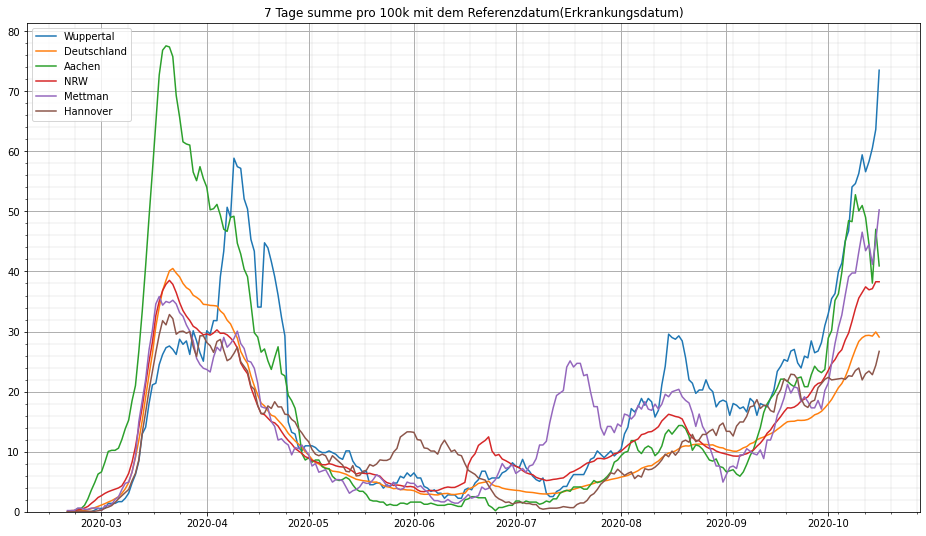

In [2]:
def interpret(data,start_date,days,days_avg,melde=True):
    #Gibt die summe an faelle wieder im zeitramen von days_avg ab dem start_date bis days in vergangenheit
    faelle=[]
    faelle_datum=[]
    for i in range(days):
        date=start_date-pd.DateOffset(days=i)
        df=datum(data,date,tage=days_avg,melde=melde)
        summe=df['AnzahlFall'].sum(axis = 0, skipna = True)
        faelle.append(summe)
        faelle_datum.append(date)
    return pd.Series(faelle,index=faelle_datum)
     

faelle_wup=interpret(data_wup,date,tage,7,melde=False)
faelle_aac=interpret(data_aac,date,tage,7,melde=False)
faelle_nrw=interpret(data_nrw,date,tage,7,melde=False)
faelle_met=interpret(data_met,date,tage,7,melde=False)
faelle_han=interpret(data_han,date,tage,7,melde=False)

faelle=interpret(data,date,tage,7,melde=False)

faelle_100k_wup=faelle_wup*(100000/355100)
faelle_100k_aac=faelle_aac*(100000/557026)
faelle_100k_met=faelle_met*(100000/485570)
faelle_100k_nrw=faelle_nrw*(100000/17930000)
faelle_100k_han=faelle_han*(100000/1157115)

faelle_100k=faelle*(100000/83000000)

plt.plot(faelle_100k_wup,label="Wuppertal") 
plt.plot(faelle_100k,label="Deutschland") 
plt.plot(faelle_100k_aac,label="Aachen") 
plt.plot(faelle_100k_nrw,label="NRW") 
plt.plot(faelle_100k_met,label="Mettman")
plt.plot(faelle_100k_han,label="Hannover") 


plt.gcf().set_size_inches(16, 9)
plt.gca().get_ylim()[1]
plt.ylim(0,plt.gca().get_ylim()[1])
plt.grid(b=True, which='major', linewidth=1)
plt.grid(b=True, which='minor', linewidth=0.2)
plt.minorticks_on()
plt.title("7 Tage summe pro 100k mit dem Referenzdatum(Erkrankungsdatum)")
plt.legend()
plt.savefig(f"orte_ref.pdf",dpi=300,transparent=False)
plt.show()

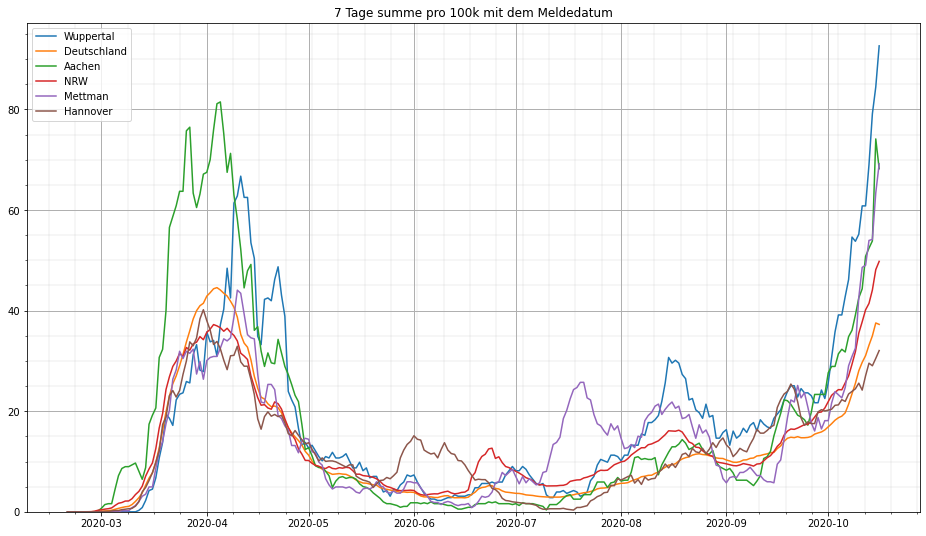

In [3]:
faelle_wup=interpret(data_wup,date,tage,7)
faelle_aac=interpret(data_aac,date,tage,7)
faelle_nrw=interpret(data_nrw,date,tage,7)
faelle_met=interpret(data_met,date,tage,7)
faelle_han=interpret(data_han,date,tage,7)

faelle=interpret(data,date,tage,7)

faelle_100k_wup=faelle_wup*(100000/355100)
faelle_100k_aac=faelle_aac*(100000/557026)
faelle_100k_met=faelle_met*(100000/485570)
faelle_100k_nrw=faelle_nrw*(100000/17930000)
faelle_100k_han=faelle_han*(100000/1157115)

faelle_100k=faelle*(100000/83000000)


plt.plot(faelle_100k_wup,label="Wuppertal") 
plt.plot(faelle_100k,label="Deutschland") 
plt.plot(faelle_100k_aac,label="Aachen") 
plt.plot(faelle_100k_nrw,label="NRW") 
plt.plot(faelle_100k_met,label="Mettman")
plt.plot(faelle_100k_han,label="Hannover") 

plt.gcf().set_size_inches(16, 9)
plt.gca().get_ylim()[1]
plt.ylim(0,plt.gca().get_ylim()[1])
plt.grid(b=True, which='major', linewidth=1)
plt.grid(b=True, which='minor', linewidth=0.2)
plt.minorticks_on()
plt.title("7 Tage summe pro 100k mit dem Meldedatum")
plt.legend()
plt.savefig(f"orte_melde.pdf",dpi=300,transparent=False)
plt.show()

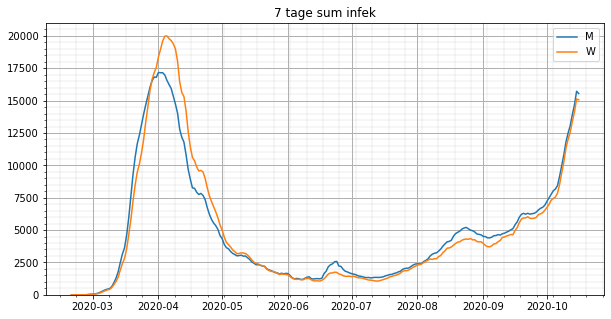

In [4]:
data_m=data.loc[data['Geschlecht']=='M']
faelle_m=interpret(data_m,date,tage,7)

data_w=data.loc[data['Geschlecht']=='W']
faelle_w=interpret(data_w,date,tage,7)

plt.plot(faelle_m,label="M")
plt.plot(faelle_w,label="W")

plt.gcf().set_size_inches(10, 5)
plt.gca().get_ylim()[1]
plt.ylim(0,plt.gca().get_ylim()[1])
plt.grid(b=True, which='major',  linewidth=1)
plt.grid(b=True, which='minor',  linewidth=0.2)
plt.minorticks_on()
plt.title("7 tage sum infek")
plt.legend()
plt.show()

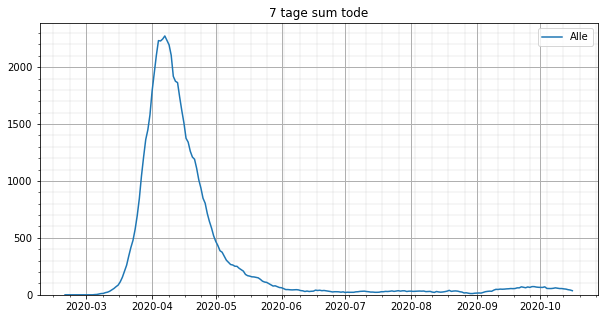

In [5]:
def interpret_death(data,start_date,days,days_avg):
    tode=[]
    tode_datum=[]
    for i in range(days):
        date=start_date-pd.DateOffset(days=i)
        df=datum(data,date,tage=days_avg)
        summe=df['AnzahlTodesfall'].sum(axis = 0, skipna = True)
        tode.append(summe)
        tode_datum.append(date)
    return pd.Series(tode,index=tode_datum)

tode=interpret_death(data,date,tage,7)
tode_w=interpret_death(data_w,date,tage,7)
tode_m=interpret_death(data_m,date,tage,7)

#plt.plot(tode_m,label="M")
#plt.plot(tode_w,label="W")
plt.plot(tode,label="Alle")
plt.gcf().set_size_inches(10, 5)
plt.gca().get_ylim()[1]
plt.ylim(0,plt.gca().get_ylim()[1])
plt.grid(b=True, which='major',  linewidth=1)
plt.grid(b=True, which='minor',  linewidth=0.2)
plt.minorticks_on()
plt.title("7 tage sum tode")
plt.legend()
plt.show()

In [6]:
datum(data,"2020/10/15",1)

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
92,44348215,1,Schleswig-Holstein,SK Flensburg,A35-A59,M,1,0,2020-10-14,1001,"16.10.2020, 00:00 Uhr",0,-9,2020-10-04,-9,0,1,Nicht übermittelt
93,44348216,1,Schleswig-Holstein,SK Flensburg,A35-A59,M,2,0,2020-10-14,1001,"16.10.2020, 00:00 Uhr",0,-9,2020-10-14,-9,0,0,Nicht übermittelt
124,44348247,1,Schleswig-Holstein,SK Flensburg,A35-A59,W,1,0,2020-10-14,1001,"16.10.2020, 00:00 Uhr",0,-9,2020-10-04,-9,0,1,Nicht übermittelt
255,44348378,1,Schleswig-Holstein,SK Kiel,A15-A34,M,1,0,2020-10-14,1002,"16.10.2020, 00:00 Uhr",0,-9,2020-10-10,-9,0,1,Nicht übermittelt
339,44348462,1,Schleswig-Holstein,SK Kiel,A15-A34,W,1,0,2020-10-14,1002,"16.10.2020, 00:00 Uhr",0,-9,2020-10-11,-9,0,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268873,44616996,16,Thüringen,LK Greiz,A35-A59,W,1,0,2020-10-14,16076,"16.10.2020, 00:00 Uhr",0,-9,2020-10-14,-9,0,0,Nicht übermittelt
268959,44617082,16,Thüringen,LK Greiz,A60-A79,M,1,0,2020-10-14,16076,"16.10.2020, 00:00 Uhr",0,-9,2020-10-13,-9,0,1,Nicht übermittelt
269169,44617292,16,Thüringen,LK Greiz,A80+,W,1,0,2020-10-14,16076,"16.10.2020, 00:00 Uhr",0,-9,2020-10-06,-9,0,1,Nicht übermittelt
269255,44617378,16,Thüringen,LK Altenburger Land,A35-A59,W,1,0,2020-10-14,16077,"16.10.2020, 00:00 Uhr",0,-9,2020-10-14,-9,0,0,Nicht übermittelt


In [7]:
Altersgruppen=["A00-A04","A05-A14","A15-A34","A35-A59","A60-A79","A80+"]

path = 'altersverteilung.csv'
alt_ver = pd.read_csv(path,header=None,thousands=".")
#alt_ver[1]=pd.to_numeric(alt_ver[1])
alt_grp=[alt_ver.iloc[0:5,1].sum(),alt_ver.iloc[5:15,1].sum(),alt_ver.iloc[15:35,1].sum(),alt_ver.iloc[35:60,1].sum(),alt_ver.iloc[60:80,1].sum(),alt_ver.iloc[80:,1].sum()]
alt_grp=pd.Series(alt_grp,index=Altersgruppen)

In [8]:
alt_grp

A00-A04     3961376
A05-A14     7429883
A15-A34    19117865
A35-A59    28919134
A60-A79    18057318
A80+        5681135
dtype: int64

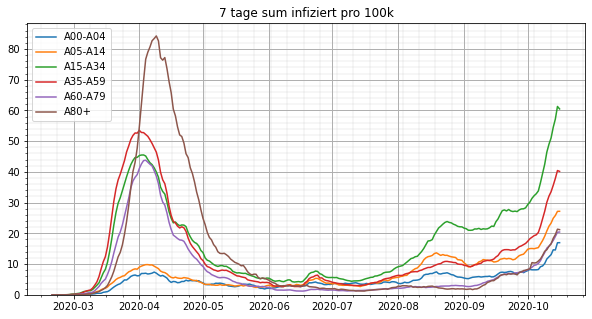

In [9]:
data_alt=[]
for gruppe in Altersgruppen:
    data_alt.append(data.loc[data["Altersgruppe"]==gruppe])
data_alt=pd.Series(data_alt,index=Altersgruppen)

data_alt_faelle=[]
for df in data_alt:
    data_alt_faelle.append(interpret(df,date,tage,7))
data_alt_faelle=pd.Series(data_alt_faelle,index=Altersgruppen)

data_alt_faelle_100k=[]
for index, value in data_alt_faelle.items():
    value=value.astype(float)
    y=(100000.0/float(alt_grp[index]))
    x=value.astype(float)*y
    data_alt_faelle_100k.append(x)
    
data_alt_faelle_100k=pd.Series(data_alt_faelle_100k,index=Altersgruppen)
    
for index, value in data_alt_faelle_100k.items():
    plt.plot(value,label=index)

plt.gcf().set_size_inches(10, 5)
plt.gca().get_ylim()[1]
plt.ylim(0,plt.gca().get_ylim()[1])
plt.grid(b=True, which='major',  linewidth=1)
plt.grid(b=True, which='minor',  linewidth=0.2)
plt.minorticks_on()
plt.title("7 tage sum infiziert pro 100k")
plt.legend()
plt.savefig(f"alter.pdf",dpi=300,transparent=False)
plt.show()


In [10]:
value.astype(float)/100

2020-10-16    0.212106
2020-10-15    0.213514
2020-10-14    0.195912
2020-10-13    0.183942
2020-10-12    0.165636
                ...   
2020-02-24    0.000000
2020-02-23    0.000000
2020-02-22    0.000000
2020-02-21    0.000000
2020-02-20    0.000000
Length: 240, dtype: float64

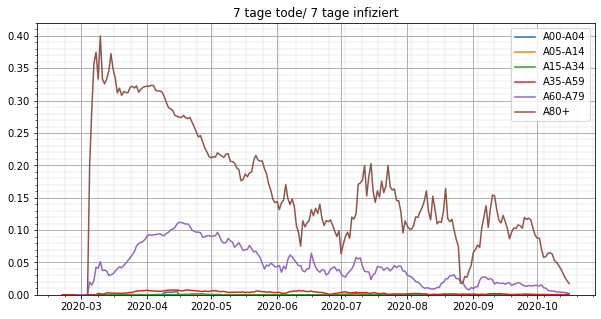

In [11]:
data_alt_tode=[]
for df in data_alt:
    data_alt_tode.append(interpret_death(df,date,tage,7))
data_alt_tode=pd.Series(data_alt_tode,index=Altersgruppen)

data_alt_tode_anteil=[]
for index, value in data_alt_tode.items():
    x=value.divide(data_alt_faelle[index],fill_value=0)
    data_alt_tode_anteil.append(x)
    
data_alt_tode_anteil=pd.Series(data_alt_tode_anteil,index=Altersgruppen)

for index, value in data_alt_tode_anteil.items():
    plt.plot(value,label=index)
    
plt.gcf().set_size_inches(10, 5)
plt.gca().get_ylim()[1]
plt.ylim(0,plt.gca().get_ylim()[1])
plt.grid(b=True, which='major',  linewidth=1)
plt.grid(b=True, which='minor',  linewidth=0.2)
plt.minorticks_on()
plt.title("7 tage tode/ 7 tage infiziert")
plt.legend()
plt.savefig(f"alter_tode.pdf",dpi=300,transparent=False)
plt.show()

In [12]:
test = pd.read_csv('testdaten.txt', sep=" ", header=None,thousands=".")
test.columns = ["KW", "Anzahl Testungen", "Positiv getestet", "Positivenquote in %","Anzahl übermittelnde Labore"]
test['Positivenquote in %'] = test["Positivenquote in %"].str.replace(',', '').astype(float)/100
test["KW"]= test["KW"].apply(lambda x: pd.to_datetime(f"2020-{x}-1",format="%Y-%W-%w"))
test

def scale(df,test):
    for i in range(len(test.index)):
        start_date=test["KW"][i]
        end_date=test["KW"][i]+pd.DateOffset(days=7)
    mask = (df['Refdatum'] > start_date) & (df['Refdatum'] <  end_date) | (df['Refdatum'] == end_date)

In [13]:
scale(data,test)

In [14]:
pd.to_datetime("2020-11-1",format="%Y-%W-%w")

Timestamp('2020-03-16 00:00:00')

In [15]:
data

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,44348123,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-09-30,1001,"16.10.2020, 00:00 Uhr",0,-9,2020-09-30,0,1,0,Nicht übermittelt
1,44348124,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-08-24,1001,"16.10.2020, 00:00 Uhr",0,-9,2020-08-24,0,1,0,Nicht übermittelt
2,44348125,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-09-26,1001,"16.10.2020, 00:00 Uhr",0,-9,2020-09-26,0,1,0,Nicht übermittelt
3,44348126,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-09-25,1001,"16.10.2020, 00:00 Uhr",0,-9,2020-09-21,0,1,1,Nicht übermittelt
4,44348127,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-09-26,1001,"16.10.2020, 00:00 Uhr",0,-9,2020-09-21,0,1,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269288,44617411,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2020-05-06,16077,"16.10.2020, 00:00 Uhr",0,-9,2020-05-04,0,1,1,Nicht übermittelt
269289,44617412,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2020-05-11,16077,"16.10.2020, 00:00 Uhr",0,-9,2020-05-01,0,1,1,Nicht übermittelt
269290,44617413,16,Thüringen,LK Altenburger Land,A80+,W,2,0,2020-05-28,16077,"16.10.2020, 00:00 Uhr",0,-9,2020-05-28,0,2,0,Nicht übermittelt
269291,44617414,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2020-06-09,16077,"16.10.2020, 00:00 Uhr",0,-9,2020-06-09,0,1,0,Nicht übermittelt
